# Steam Time Series Analyses

In [16]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [17]:
#import and read dataset
df = pd.read_csv('sample_df.csv')

In [18]:
df.head()

,app_id,helpful,funny,is_recommended,hours,user_id,rec_year,rec_month,products,user_reviews,...,mac,linux,rating,positive_ratio,game_reviews,price_final,price_original,discount,release_year,release_month
0,469600,0,0,True,32.3,1121468,2022,7,109,4,...,True,False,Very Positive,86,8426,22.99,22.99,0.0,2021,10
1,219990,0,0,True,296.2,12072912,2022,8,46,2,...,False,False,Very Positive,93,71555,25.00,0.00,0.0,2016,2
2,1240440,195,6,False,50.7,13221401,2021,11,490,33,...,False,False,Positive,70,161274,0.00,0.00,0.0,2021,11
3,35700,5,0,False,1.8,2076462,2013,11,1152,12,...,True,True,Very Positive,95,11058,14.99,14.99,0.0,2009,7
4,304930,0,0,True,744.4,9156954,2019,11,85,9,...,True,True,Very Positive,91,515016,0.00,0.00,0.0,2017,7


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   app_id          100000 non-null  int64  
 1   helpful         100000 non-null  int64  
 2   funny           100000 non-null  int64  
 3   is_recommended  100000 non-null  bool   
 4   hours           100000 non-null  float64
 5   user_id         100000 non-null  int64  
 6   rec_year        100000 non-null  int64  
 7   rec_month       100000 non-null  int64  
 8   products        100000 non-null  int64  
 9   user_reviews    100000 non-null  int64  
 10  title           100000 non-null  object 
 11  win             100000 non-null  bool   
 12  mac             100000 non-null  bool   
 13  linux           100000 non-null  bool   
 14  rating          100000 non-null  object 
 15  positive_ratio  100000 non-null  int64  
 16  game_reviews    100000 non-null  int64  
 17  price_final

In [20]:
df.head()

,app_id,helpful,funny,is_recommended,hours,user_id,rec_year,rec_month,products,user_reviews,...,mac,linux,rating,positive_ratio,game_reviews,price_final,price_original,discount,release_year,release_month
0,469600,0,0,True,32.3,1121468,2022,7,109,4,...,True,False,Very Positive,86,8426,22.99,22.99,0.0,2021,10
1,219990,0,0,True,296.2,12072912,2022,8,46,2,...,False,False,Very Positive,93,71555,25.00,0.00,0.0,2016,2
2,1240440,195,6,False,50.7,13221401,2021,11,490,33,...,False,False,Positive,70,161274,0.00,0.00,0.0,2021,11
3,35700,5,0,False,1.8,2076462,2013,11,1152,12,...,True,True,Very Positive,95,11058,14.99,14.99,0.0,2009,7
4,304930,0,0,True,744.4,9156954,2019,11,85,9,...,True,True,Very Positive,91,515016,0.00,0.00,0.0,2017,7


## Time Series

### Reviews Throughout the Years:
#### Comparing Total User Reviews to Total Game Reviews

I want to examine whether a relationship exists amongst the following variables: User Reviews and Total Game Reviews. We can accomplish this using a correlation analysis.

In [21]:
# Group by year and sum the number of reviews
user_reviews_by_year = df.groupby('rec_year')['user_reviews'].sum().reset_index()
game_reviews_by_year = df.groupby('rec_year')['game_reviews'].sum().reset_index()

# Merge both dataframes on 'rec_year'
merged_reviews = pd.merge(user_reviews_by_year, game_reviews_by_year, on='rec_year')

# Calculate Pearson correlation coefficient
correlation, p_value = pearsonr(merged_reviews['user_reviews'], merged_reviews['game_reviews'])

print(f"Pearson Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson Correlation Coefficient: 0.9751
P-value: 0.0000


The correlation analysis suggests a very strong positive correlation between the number of user reviews and game reviews over time. Specifically, as game reviews increase, user reviews also increase proportionally.

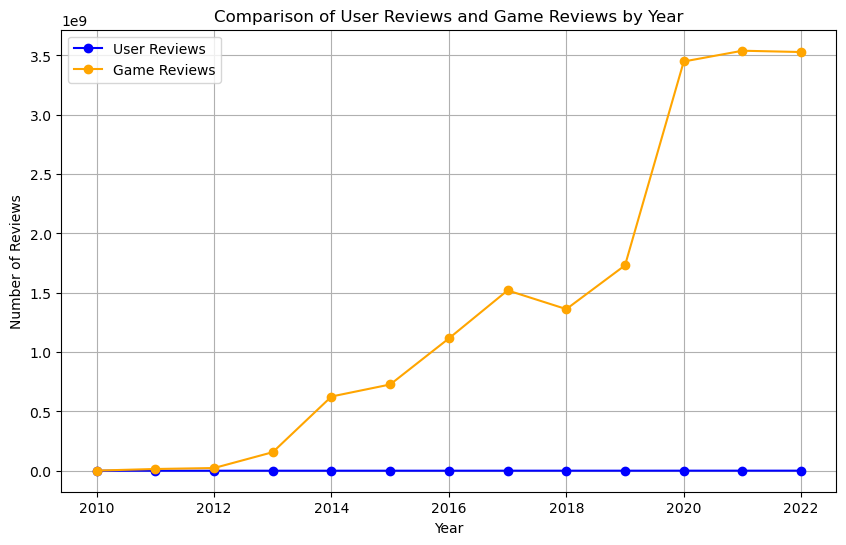

In [8]:
# Group by year and sum the number of user reviews and game reviews
user_reviews_by_year = df.groupby('rec_year')['user_reviews'].sum().reset_index()
game_reviews_by_year = df.groupby('rec_year')['game_reviews'].sum().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))

# Plot user reviews
plt.plot(user_reviews_by_year['rec_year'], user_reviews_by_year['user_reviews'], marker='o', linestyle='-', color='blue', label='User Reviews')

# Plot game reviews
plt.plot(game_reviews_by_year['rec_year'], game_reviews_by_year['game_reviews'], marker='o', linestyle='-', color='orange', label='Game Reviews')

# Add title and labels
plt.title('Comparison of User Reviews and Game Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend()  # Add legend to differentiate lines
plt.grid()

# Show plot
plt.show()


The graph initially appears to suggest no correlation between the number of user reviews and game reviews, as their trend lines move in different directions with a widening gap over time. However, the correlation analysis indicates a strong positive relationship between these variables. This suggests that despite differences in volume, both metrics are increasing over time in a related manner. To improve clarity, we have separated the graph into two plots, each with appropriately scaled units, allowing for a more accurate representation of their individual trends.

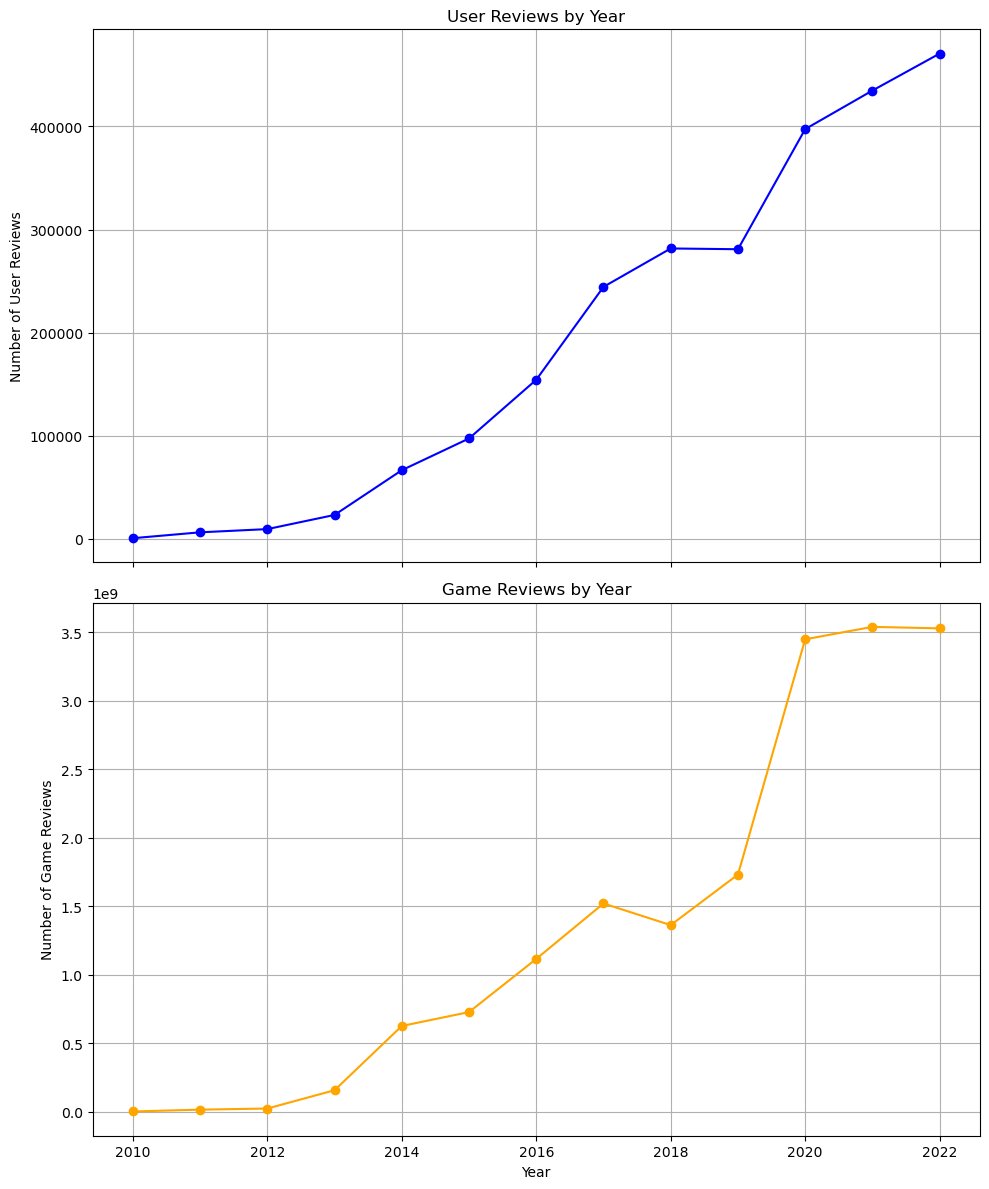

In [9]:
# Group by year and sum the number of user reviews
user_reviews_by_year = df.groupby('rec_year')['user_reviews'].sum().reset_index()

# Group by year and sum the number of game reviews
game_reviews_by_year = df.groupby('rec_year')['game_reviews'].sum().reset_index()

# Plot the time series in separate subplots
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plot user reviews
axes[0].plot(user_reviews_by_year['rec_year'], user_reviews_by_year['user_reviews'], marker='o', linestyle='-', color='blue')
axes[0].set_title('User Reviews by Year')
axes[0].set_ylabel('Number of User Reviews')
axes[0].grid()

# Plot game reviews
axes[1].plot(game_reviews_by_year['rec_year'], game_reviews_by_year['game_reviews'], marker='o', linestyle='-', color='orange')
axes[1].set_title('Game Reviews by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Game Reviews')
axes[1].grid()

plt.tight_layout()
plt.show()


Now that each is split into two graphs, we have a clearer picture of what is happening. The number of user reviews and game reviews both trend upwards over time. Our correlation analysis confirms a strong positive relationship between the two, indicating that as user reviews increase, game reviews follow a similar pattern. This suggests that as the years go by, Steam users are not only reviewing more games but also contributing more feedback overall. Additionally, Steam games are receiving more reviews over time, reinforcing the growing engagement within the platform.

## Recommendations Over Time

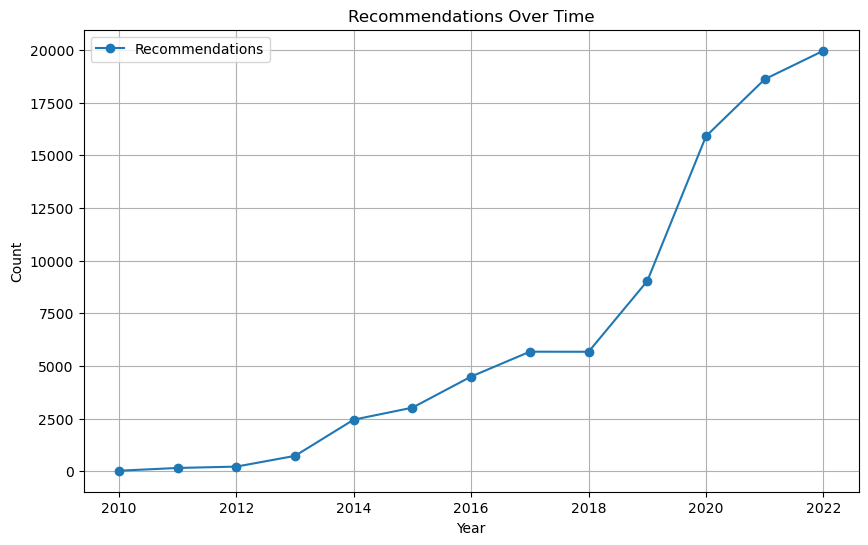

In [23]:
# Group by year and calculate the total recommendations
recommendations_by_year = df.groupby('rec_year')['is_recommended'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(recommendations_by_year['rec_year'], recommendations_by_year['is_recommended'], marker='o', linestyle='-', label='Recommendations')
plt.title('Recommendations Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.show()